<a href="https://colab.research.google.com/github/VictorV1ana/desafios/blob/main/GQ7_VictorViana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste 7 - Gestão da Qualidade
### Victor Viana 

In [55]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
sns.set_theme(style="darkgrid")

In [56]:
# construindo a base dos dados
df = pd.DataFrame({"CG34":[2.43, 3.45, 2.07, 2.68, 2.72, 2.90, 0.45, 2.51, 2.26] ,
                   "QT56":[1.92, 2.51, 2.28, 2.15, 1.25, 1.45, 2.79, 1.88, 1.56], 
                   "DCS35":[0.58, 1.95,1.66,2.12,1.98,1.10,1.78,2.23,1.45]})
df["cachorros"] = [1,2,3,4,5,6,7,8,9]

In [57]:
#vizualizar o dataset 
df.head()

,CG34,QT56,DCS35,cachorros
0,2.43,1.92,0.58,1
1,3.45,2.51,1.95,2
2,2.07,2.28,1.66,3
3,2.68,2.15,2.12,4
4,2.72,1.25,1.98,5


In [58]:
#plotar resumo estatistico
print('-----Resumo Estatístico das rações-----')
df[['CG34','QT56','DCS35']].describe()

-----Resumo Estatístico das rações-----


,CG34,QT56,DCS35
count,9.000000,9.000000,9.000000
mean,2.385556,1.976667,1.650000
std,0.827302,0.507395,0.531578
min,0.450000,1.250000,0.580000
25%,2.260000,1.560000,1.450000
50%,2.510000,1.920000,1.780000
75%,2.720000,2.280000,1.980000
max,3.450000,2.790000,2.230000


* No primeiro momento a ração CG34 é a que tem maior média e mediana. Entretanto, podem ter outilers influenciando. assim vamos vaerificar a presença deles:

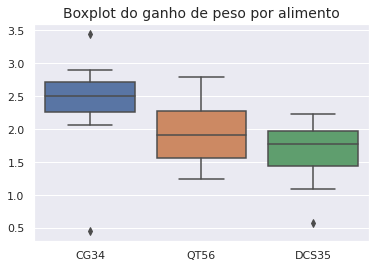

In [59]:
#plotar boxplot
plt.title("Boxplot do ganho de peso por alimento",fontsize=14)
sns.boxplot(data=df[["CG34","QT56","DCS35"]]);

* Segundo o método do IQR usado pelo gráfico, existem outilers. Nesse sentido, vamos tratar para fazer uma análise menos enviesada. O método ultilizado será a distancia interquartil. Caso a variável tenha valor maior que o limite superior, substituiremos pelo limite superior e o equipalente para o limite inferior.

In [60]:
def tratar_outiler(df,columns):
  '''
  funcao retorna um dataset sem outliers 
  substituindo eles pelo limite superior e inferior
  df - data frame original 
  columns - colunas que devem ser analisadas'''

  df_aux = df
  for i in columns:
    Q1, Q3 = np.percentile(df_aux[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_aux[i] = df_aux[i].clip(lower_range,upper_range)
  return df_aux

In [61]:
# aplicar a função que retira outliers
df = tratar_outiler(df,columns=["CG34","QT56","DCS35"])

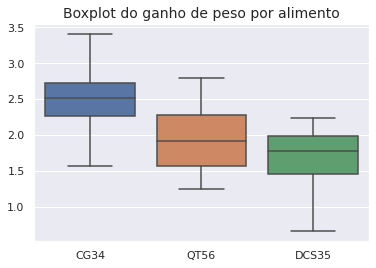

In [62]:
#plotar boxplot
plt.title("Boxplot do ganho de peso por alimento",fontsize=14)
sns.boxplot(data=df[["CG34","QT56","DCS35"]]);

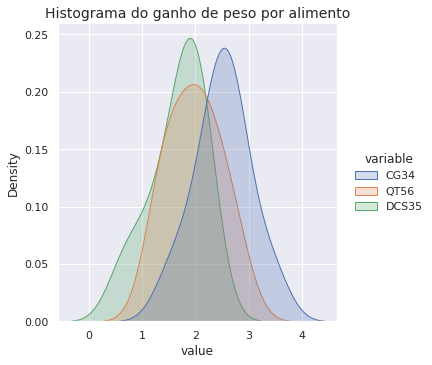

In [63]:
#plotar histograma
dados_hist = df[['CG34','QT56','DCS35']].melt()
sns.displot(dados_hist , x="value", hue="variable", kind="kde", fill = True)
plt.title("Histograma do ganho de peso por alimento",fontsize=14); 

In [64]:
#plotar resumo estatistico
print('-----Resumo Estatístico das rações-----')
df[['CG34','QT56','DCS35']].describe()

-----Resumo Estatístico das rações-----


,CG34,QT56,DCS35
count,9.000000,9.000000,9.000000
mean,2.505556,1.976667,1.658333
std,0.522138,0.507395,0.512969
min,1.570000,1.250000,0.655000
25%,2.260000,1.560000,1.450000
50%,2.510000,1.920000,1.780000
75%,2.720000,2.280000,1.980000
max,3.410000,2.790000,2.230000


**Resposta da Questão:**


> Para efeito de hipótese e análise, considera-se que o melhor alimento é aquele que mais aumenta o peso do animal. Dessa forma, fica evidente que a ração CG34 foi a que teve maior gnaho de peso. Tanto a interpretação da distribuição com o histograma quanto a do boxplot indicam isso. As medidas de estatística descritiva também apontam para a CG34. Tanto média quanto mediana são maiores com um desvio padrão (std) muito similar a dos outros tipos. 

